First import all the data science libraries we will need. for now, it is only pandas

In [1]:
import pandas as pd

Now let's read in the csv file that currently contains the movies from the 2010s

In [2]:
movies_2010s = pd.read_csv('../dbs/movies_from_2010s.csv')
movies_2010s[['title', 'genres', 'budget', 'revenue', 'overview']].head(5)

,title,genres,budget,revenue,overview
0,Daybreakers,Action|Drama|Horror|Thriller,20000000.0,51416464.0,"In the year 2019, a plague has transformed alm..."
1,Leap Year,Comedy|Romance,19000000.0,29922472.0,When yet another anniversary passes without a ...
2,The Book of Eli,Action|Adventure|Drama,80000000.0,157107755.0,"A post-apocalyptic tale, in which a lone man f..."
3,If You Love,Drama|Musical|Romance,2000000.0,0.0,Musiikkielokuva joka kertoo ministerin tyttäre...
4,Legion,Action|Fantasy|Horror|Thriller,26000000.0,67918658.0,"When God loses faith in humankind, he sends hi..."


Because of some preprocessing I have already done, some columns are guranteed to not have missing values. But I have yet to verify some of the data that was collected from the tmdb database. I don't want any rows that have missing (or in this case 0) revenue. So let's remove that from the database.

In [3]:
movies_2010s.dropna(inplace=True) # get rid of movies with null values
movies_2010s = movies_2010s.loc[movies_2010s['revenue'] > 0] # get revenues that are greater than 0
movies_2010s.head(5)

,movie_id,title,genres,imdb_id,tmdb_id,year,budget,vote_count,vote_average,revenue,runtime,popularity,overview
0,73268,Daybreakers,Action|Drama|Horror|Thriller,433362,19901,2010,20000000.0,1255.0,6.2,51416464.0,98.0,16.378,"In the year 2019, a plague has transformed alm..."
1,73319,Leap Year,Comedy|Romance,1216492,25195,2010,19000000.0,1387.0,6.9,29922472.0,100.0,18.924,When yet another anniversary passes without a ...
2,73321,The Book of Eli,Action|Adventure|Drama,1037705,20504,2010,80000000.0,4303.0,6.7,157107755.0,118.0,24.843,"A post-apocalyptic tale, in which a lone man f..."
4,73929,Legion,Action|Fantasy|Horror|Thriller,1038686,22894,2010,26000000.0,1630.0,5.6,67918658.0,100.0,28.993,"When God loses faith in humankind, he sends hi..."
6,74131,Extraordinary Measures,Drama,1244659,27569,2010,31000000.0,192.0,6.3,15134293.0,105.0,9.145,Working-class father John Crowley is finally o...


As you can see, "As I love" was removed from the database. Now let's see how many movies we have to work with.

In [4]:
movies_2010s.shape

(3381, 13)

Now we only want to consider movies that most people have actually rated, so let's use the 80th percentile as a cutoff to get that information, meaning for a movie to stay in the database, it must have more votes than at least 80% of the movies in the list.

In [5]:
num_votes_required = movies_2010s['vote_count'].quantile(0.8)
num_votes_required

2106.0

In [6]:
watched_movies_2010s = movies_2010s.copy().loc[movies_2010s['vote_count'] >= num_votes_required]
watched_movies_2010s.shape

(677, 13)

In [7]:
watched_movies_2010s[['title', 'genres', 'budget', 'revenue', 'overview']].head(5)

,title,genres,budget,revenue,overview
2,The Book of Eli,Action|Adventure|Drama,80000000.0,157107755.0,"A post-apocalyptic tale, in which a lone man f..."
9,Valentine's Day,Comedy|Romance,52000000.0,216485654.0,More than a dozen Angelenos navigate Valentine...
11,Shutter Island,Drama|Mystery|Thriller,80000000.0,294804195.0,World War II soldier-turned-U.S. Marshal Teddy...
12,Percy Jackson & the Olympians: The Lightning T...,Adventure|Fantasy,95000000.0,226497209.0,"Accident prone teenager, Percy discovers he's ..."
19,Dear John,Drama|Romance|War,25000000.0,114977104.0,While Sergeant John Tyree is home on two weeks...


Let's take a look at the distriution of films across the decade.

First, we will print each film from the year., but let's store these counts in an array so we can plot them.

In [8]:
import numpy as np
count_by_year = np.ndarray(10, dtype='int32')
print("YEAR| COUNT MOVIES")
for year in range(2010, 2020):
    count_by_year[year-2010] = watched_movies_2010s.loc[movies_2010s.year == year, 'year'].count()
    print(f"{year}:", count_by_year[year-2010])

YEAR| COUNT MOVIES
2010: 54
2011: 63
2012: 67
2013: 87
2014: 74
2015: 73
2016: 91
2017: 72
2018: 55
2019: 41


Now let's plot the distribution

Text(0.5, 1.0, 'Number of films from each year in the decade')

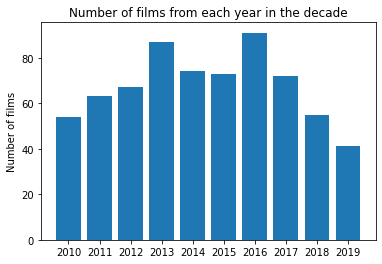

In [9]:
import matplotlib.pyplot as plt
years = np.arange(2010, 2020)
labels = np.arange(len(years))
plt.bar(labels, count_by_year, align='center')
plt.xticks(labels, years)
plt.ylabel("Number of films")
plt.title("Number of films from each year in the decade")